1.Loading the packages

In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2.Loading the dataset

In [2]:
data_csv = pd.read_csv(r"C:\Users\moham\Downloads\equipment_anomaly_data.csv")

3.Splitting into training and testing datasets

In [3]:
x_faulty,y_faulty = train_test_split(data_csv[data_csv['faulty'] == 0.0],test_size = 0.2,shuffle = True)

In [4]:
faulty_data = data_csv[data_csv['faulty'] == 0.0]

no_faulty_train, no_faulty_test = train_test_split(faulty_data, test_size=0.2, shuffle=True, random_state=42)

In [5]:
no_faulty_train = no_faulty_train.drop(['faulty','location','equipment'],axis = 1)

In [6]:
faulty_data = data_csv[data_csv['faulty'] == 1.0]
test = pd.concat([no_faulty_test, faulty_data], ignore_index=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = test.drop(columns=['faulty']) 
y_test = test['faulty']               


In [7]:
X_test = X_test.drop(['location','equipment'],axis = 1)

4.Scaling and modelling 

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.04)
ocsvm.fit(X_train_scaled)

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,nu,0.04
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


5.predicting for the testing data

              precision    recall  f1-score   support

      Normal       0.97      0.96      0.96      1381
      Faulty       0.92      0.94      0.93       767

    accuracy                           0.95      2148
   macro avg       0.95      0.95      0.95      2148
weighted avg       0.95      0.95      0.95      2148

[[1321   60]
 [  44  723]]


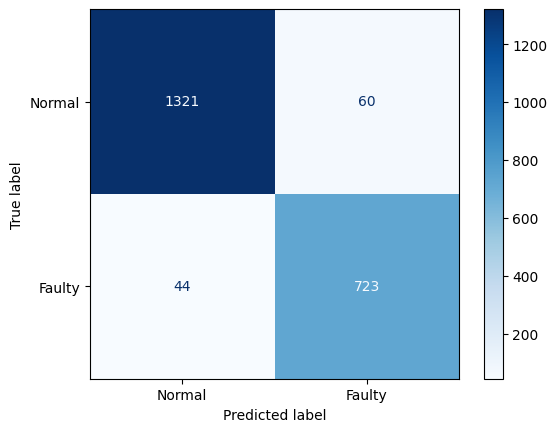

In [25]:
y_pred = ocsvm.predict(X_test_scaled)
y_pred = [0 if i == 1 else 1 for i in y_pred]
print(classification_report(y_test, y_pred, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()